# Lib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
import datetime
import matplotlib.dates as mdates

from matplotlib.animation import FuncAnimation
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

# variables & params

In [2]:
plt.style.use("Solarize_Light2")
plt.rcParams['font.family'] = 'Manjari'

# import data and geodata

In [3]:
df = pd.read_csv("datos/vacunacion_municipios_bo.csv", index_col=0)
df.fecha = pd.to_datetime(df.fecha)
df

fecha  cod_ine municipio departamento  dosis  porcentaje
0    2021-10-23    20503  Aucapata       La Paz      1          10
1    2021-10-23    20503  Aucapata       La Paz      2           9
2    2021-10-30    20503  Aucapata       La Paz      1          10
3    2021-10-30    20503  Aucapata       La Paz      2           9
4    2021-11-13    20503  Aucapata       La Paz      1          13
...         ...      ...       ...          ...    ...         ...
5400 2021-12-04    70706    Camiri   Santa Cruz      2          93
5401 2021-12-18    70706    Camiri   Santa Cruz      1         100
5402 2021-12-18    70706    Camiri   Santa Cruz      2          93
5403 2022-01-22    70706    Camiri   Santa Cruz      1         106
5404 2022-01-22    70706    Camiri   Santa Cruz      2          96

[5405 rows x 6 columns]

In [4]:
sdsn = pd.read_csv("other/sdsn/sdsn.csv")
sdsn

Código              Municipio Departamento  \
0     10101                  Sucre   Chuquisaca   
1     10102                 Yotala   Chuquisaca   
2     10103                 Poroma   Chuquisaca   
3     10201                Azurduy   Chuquisaca   
4     10202                Tarvita   Chuquisaca   
..      ...                    ...          ...   
334   90401             Santa Rosa        Pando   
335   90402                 Ingavi        Pando   
336   90501        Nueva Esperanza        Pando   
337   90502  Villa Nueva-Loma Alta        Pando   
338   90503         Santos Mercado        Pando   

     Índice Municipal de Desarrollo Sostenible  Ranking del Índice de Bolivia  \
0                                         69.6                              5   
1                                         55.5                             75   
2                                         35.7                            339   
3                                         37.9                            333   
4                                         40.0                            327   
..                                         ...                            ...   
334                                       48.2                            217   
335                                       43.6                            295   
336                                       46.0                            273   
337                                       43.0                            305   
338                                       40.9                            318   

     Población 2020  Tasa de urbanización, 2012 (% de población)  \
0            295476                                         91.4   
1             10017                                          0.0   
2             18947                                          0.0   
3             10948                                          0.0   
4             14688                                          0.0   
..              ...                                          ...   
334            2506                                          0.0   
335            1840                                          0.0   
336            2422                                          0.0   
337            3209                                          0.0   
338            2506                                          0.0   

    Tasa de pobreza energética extrema, 2016 (% de viviendas)  \
0                                                 23.8          
1                                                 45.8          
2                                                 96.1          
3                                                 86.8          
4                                                 86.1          
..                                                 ...          
334                                                  .          
335                                                  .          
336                                                  .          
337                                                  .          
338                                                  .          

    Número de viviendas que consumen menos del 25% del límite de Tarifa Dignidad (210 kWh/año), 2016  \
0                                                17473                                                 
1                                                 1229                                                 
2                                                 4839                                                 
3                                                 2199                                                 
4                                                 2935                                                 
..                                                 ...                                                 
334                                                  .                                       

In [5]:
casos = pd.read_csv("https://github.com/dquintani/covid/blob/main/casos_municipios_completo.csv?raw=true", index_col=0)
casos

fecha  cod_ine                 municipio  confirmados  \
0      2020-03-19    20101  Nuestra Señora de La Paz            1   
1      2020-03-24    20101  Nuestra Señora de La Paz            1   
2      2020-03-25    20101  Nuestra Señora de La Paz            1   
3      2020-03-26    20101  Nuestra Señora de La Paz            2   
4      2020-03-28    20101  Nuestra Señora de La Paz            1   
...           ...      ...                       ...          ...   
42607  2021-04-23    90402                    Ingavi            3   
42608  2021-04-26    90402                    Ingavi            1   
42609  2021-05-24    90402                    Ingavi            2   
42610  2021-06-07    90402                    Ingavi            2   
42611  2021-11-12    90402                    Ingavi            1   

      departamento  poblacion  
0           La Paz     816044  
1           La Paz     816044  
2           La Paz     816044  
3           La Paz     816044  
4           La Paz     816044  
...            ...        ...  
42607        Pando       1840  
42608        Pando       1840  
42609        Pando       1840  
42610        Pando       1840  
42611        Pando       1840  

[42612 rows x 6 columns]

### geo maps

In [6]:
df_map = gpd.read_file("other/geo/municipios.339.geojson")
df_map['CODIGO'] = df_map['CODIGO'].str[1:]
df_map = df_map.rename(columns={"CODIGO": "cod_ine"})
df_map["cod_ine"] = df_map["cod_ine"].astype(float)

display(df_map)
df_map.plot

MUNICIPIO            name  cod_ine  rmapshaperid  \
0         Esmeralda       Esmeralda  40505.0             0   
1         Quillacas       Quillacas  40202.0             1   
2    Pampa Aullagas  Pampa Aullagas  40802.0             2   
3         Llallagua       Llallagua  50203.0             3   
4          Caripuyo        Caripuyo  50702.0             4   
..              ...             ...      ...           ...   
339        Pasorapa        Pasorapa  30202.0           339   
340       Cotagaita       Cotagaita  50601.0           340   
341         Camargo         Camargo  10701.0           341   
342        Villazón        Villazón  51501.0           342   
343         Padcaya         Padcaya  60201.0           343   

                                              geometry  
0    POLYGON ((-68.26700 -18.81620, -68.23940 -18.8...  
1    POLYGON ((-66.50210 -19.35990, -66.54580 -19.3...  
2    POLYGON ((-67.05310 -19.09030, -67.05150 -19.1...  
3    POLYGON ((-66.41650 -18.25900, -66.41590 -18.2...  
4    POLYGON ((-66.52390 -18.08950, -66.51240 -18.0...  
..                                                 ...  
339  POLYGON ((-64.69980 -18.08970, -64.69190 -18.0...  
340  POLYGON ((-65.55440 -20.29200, -65.55710 -20.3...  
341  POLYGON ((-64.86470 -20.49130, -64.86870 -20.5...  
342  POLYGON ((-65.39070 -21.84670, -65.38950 -21.8...  
343  POLYGON ((-64.36040 -21.82250, -64.35710 -21.8...  

[344 rows x 5 columns]

# data manipulation

## add poblacion2020

In [7]:
#only population
sdsn = sdsn.loc[:,["Código", "Población 2020"]]

#merge
df = df.merge(sdsn, left_on="cod_ine", right_on="Código")

#consolidate
df = df.drop("Código", axis=1) 
df = df.rename({"Población 2020": "poblacion2020"}, axis=1)
df_pop = df.pop("poblacion2020")
df.insert(4,"poblacion2020", df_pop)

df

fecha  cod_ine municipio departamento  poblacion2020  dosis  \
0    2021-10-23    20503  Aucapata       La Paz           5771      1   
1    2021-10-23    20503  Aucapata       La Paz           5771      2   
2    2021-10-30    20503  Aucapata       La Paz           5771      1   
3    2021-10-30    20503  Aucapata       La Paz           5771      2   
4    2021-11-13    20503  Aucapata       La Paz           5771      1   
...         ...      ...       ...          ...            ...    ...   
5400 2021-12-04    70706    Camiri   Santa Cruz          36485      2   
5401 2021-12-18    70706    Camiri   Santa Cruz          36485      1   
5402 2021-12-18    70706    Camiri   Santa Cruz          36485      2   
5403 2022-01-22    70706    Camiri   Santa Cruz          36485      1   
5404 2022-01-22    70706    Camiri   Santa Cruz          36485      2   

      porcentaje  
0             10  
1              9  
2             10  
3              9  
4             13  
...          ...  
5400          93  
5401         100  
5402          93  
5403         106  
5404          96  

[5405 rows x 7 columns]

## create dataframe formats

### long format (default)

In [8]:
df = df
df

fecha  cod_ine municipio departamento  poblacion2020  dosis  \
0    2021-10-23    20503  Aucapata       La Paz           5771      1   
1    2021-10-23    20503  Aucapata       La Paz           5771      2   
2    2021-10-30    20503  Aucapata       La Paz           5771      1   
3    2021-10-30    20503  Aucapata       La Paz           5771      2   
4    2021-11-13    20503  Aucapata       La Paz           5771      1   
...         ...      ...       ...          ...            ...    ...   
5400 2021-12-04    70706    Camiri   Santa Cruz          36485      2   
5401 2021-12-18    70706    Camiri   Santa Cruz          36485      1   
5402 2021-12-18    70706    Camiri   Santa Cruz          36485      2   
5403 2022-01-22    70706    Camiri   Santa Cruz          36485      1   
5404 2022-01-22    70706    Camiri   Santa Cruz          36485      2   

      porcentaje  
0             10  
1              9  
2             10  
3              9  
4             13  
...          ...  
5400          93  
5401         100  
5402          93  
5403         106  
5404          96  

[5405 rows x 7 columns]

### wide format

In [9]:
df_wide = df.pivot_table(index=['fecha', "cod_ine", "municipio","departamento","poblacion2020"], columns='dosis', values='porcentaje',
               # aggfunc='sum', fill_value=''
              ).reset_index()
df_wide

dosis      fecha  cod_ine                      municipio departamento  \
0     2021-10-23    10101                          Sucre   Chuquisaca   
1     2021-10-23    10102                         Yotala   Chuquisaca   
2     2021-10-23    10103                         Poroma   Chuquisaca   
3     2021-10-23    10201                        Azurduy   Chuquisaca   
4     2021-10-23    10202                        Tarvita   Chuquisaca   
...          ...      ...                            ...          ...   
2701  2022-01-22    90401  Nacebe (Santa Rosa Del Abuna)        Pando   
2702  2022-01-22    90402               Ingavi (Humaita)        Pando   
2703  2022-01-22    90501  Nuevo Manoa (Nueva Esperanza)        Pando   
2704  2022-01-22    90502        Villa Nueva (Loma Alta)        Pando   
2705  2022-01-22    90503        Eureka (Santos Mercado)        Pando   

dosis  poblacion2020     1     2  
0             295476  85.0  70.0  
1              10017  49.0  46.0  
2              18947  20.0  13.0  
3              10948  37.0  30.0  
4              14688  20.0  17.0  
...              ...   ...   ...  
2701            2506  69.0  55.0  
2702            1840  43.0  25.0  
2703            2422  44.0  31.0  
2704            3209  61.0  43.0  
2705            2506  54.0  38.0  

[2706 rows x 7 columns]

### single df for each dose

In [10]:
df_primeras = df[df.dosis==1]
# display(df_primeras)
df_segundas = df[df.dosis==2]
# display(df_segundas)

# PARAMETERS

In [11]:
latest_date = df.sort_values("fecha")
latest_date = latest_date.fecha.iloc[-1].date()
print(str(latest_date))

2022-01-22


In [12]:
list_dates = df.sort_values("fecha").fecha.unique()
list(list_dates)

[numpy.datetime64('2021-10-23T00:00:00.000000000'),
 numpy.datetime64('2021-10-30T00:00:00.000000000'),
 numpy.datetime64('2021-11-13T00:00:00.000000000'),
 numpy.datetime64('2021-11-20T00:00:00.000000000'),
 numpy.datetime64('2021-11-27T00:00:00.000000000'),
 numpy.datetime64('2021-12-04T00:00:00.000000000'),
 numpy.datetime64('2021-12-18T00:00:00.000000000'),
 numpy.datetime64('2022-01-22T00:00:00.000000000')]

In [13]:
#list mun and dept by population
list_mun = df.sort_values("poblacion2020", ascending=False).municipio.unique()
list_dptm = df.sort_values("poblacion2020", ascending=False).departamento.unique()

In [14]:
#mun dict by population
df = df.sort_values("poblacion2020", ascending=False)
mun_dict = dict(zip(df.cod_ine,df.municipio))

# save csv for each mun

In [15]:
for i in range(len(mun_dict)):
    mun = df[df.cod_ine==list(mun_dict.keys())[i]]
    mun.to_csv("datos/municipios_individuales/{}.csv".format(list(mun_dict.values())[i]), index=False)

# EXPLORACIÓN

## hmm algunos municipios no son incluidos en algunos mapas

In [16]:
for i in mun_dict.keys():
    if len(df[df.cod_ine==i]) != len(list_dates)*2:
        dfx = df[df.cod_ine==i]
        print(i,mun_dict[i], "--", len(dfx))
    

40101 Oruro -- 15
40701 Huanuni -- 15
80602 San Andres -- 15
80402 Exaltacion -- 15
41601 Huayllamarca -- 15
40702 Machacamarca -- 15
40401 Curahuara De Carangas -- 15
50902 S.P.De Quemes -- 4


## find weird dat... vaccinations going down?


/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

San Matias
Tarvita


/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Porco


/tmp/ipykernel_86856/268788579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Ayata


/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Boyuibe
San Javier(Bni)
Huayllamarca


/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Villa Nueva (Loma Alta)
Ingavi (Humaita)


/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)
/tmp/ipykernel_86856/268788579.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

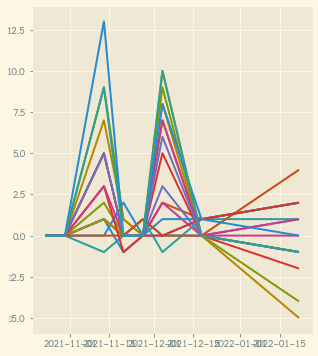

In [17]:
## find weird dat... vaccinations going down?
fig, axs = plt.subplots(1,1, figsize=(5,6))
# axs = axs.flatten()

mun = list_mun#[:10]
mun = list(mun_dict.keys())#[:60]

for i in range(len(mun)):
    df_mun = df_wide[df_wide.cod_ine==mun[i]]
    df_mun["diff1"] = df_mun.loc[:,1].diff().fillna(0)
    df_mun["diff2"] = df_mun.loc[:,2].diff().fillna(0)
    # numerical_columns = ["1_diff", "2_diff"]
    # df_mun[df_mun[numerical_columns] < 0].count()
    if len(df_mun[df_mun["diff2"]<0])>0:
        print(mun_dict[mun[i]])
        x = df_mun.fecha
        y1 = df_mun["diff1"]
        y2 = df_mun["diff2"]
        axs.plot(x, y1, label=mun[i])
        axs.plot(x, y2, label=mun[i])
    # axs.legend()
    # print(mun[i])
    # axs.plot

In [18]:
# boyuibe, por ejemplo, baja sus primeras el 20 de noviembre
df_wide[df_wide.municipio=="Boyuibe"]

dosis      fecha  cod_ine municipio departamento  poblacion2020     1     2
275   2021-10-23    70707   Boyuibe   Santa Cruz           6154  73.0  71.0
614   2021-10-30    70707   Boyuibe   Santa Cruz           6154  73.0  71.0
952   2021-11-13    70707   Boyuibe   Santa Cruz           6154  74.0  72.0
1290  2021-11-20    70707   Boyuibe   Santa Cruz           6154  73.0  72.0
1628  2021-11-27    70707   Boyuibe   Santa Cruz           6154  73.0  73.0
1966  2021-12-04    70707   Boyuibe   Santa Cruz           6154  74.0  72.0
2304  2021-12-18    70707   Boyuibe   Santa Cruz           6154  75.0  73.0
2642  2022-01-22    70707   Boyuibe   Santa Cruz           6154  77.0  75.0

# GRAFICAS

### original graph

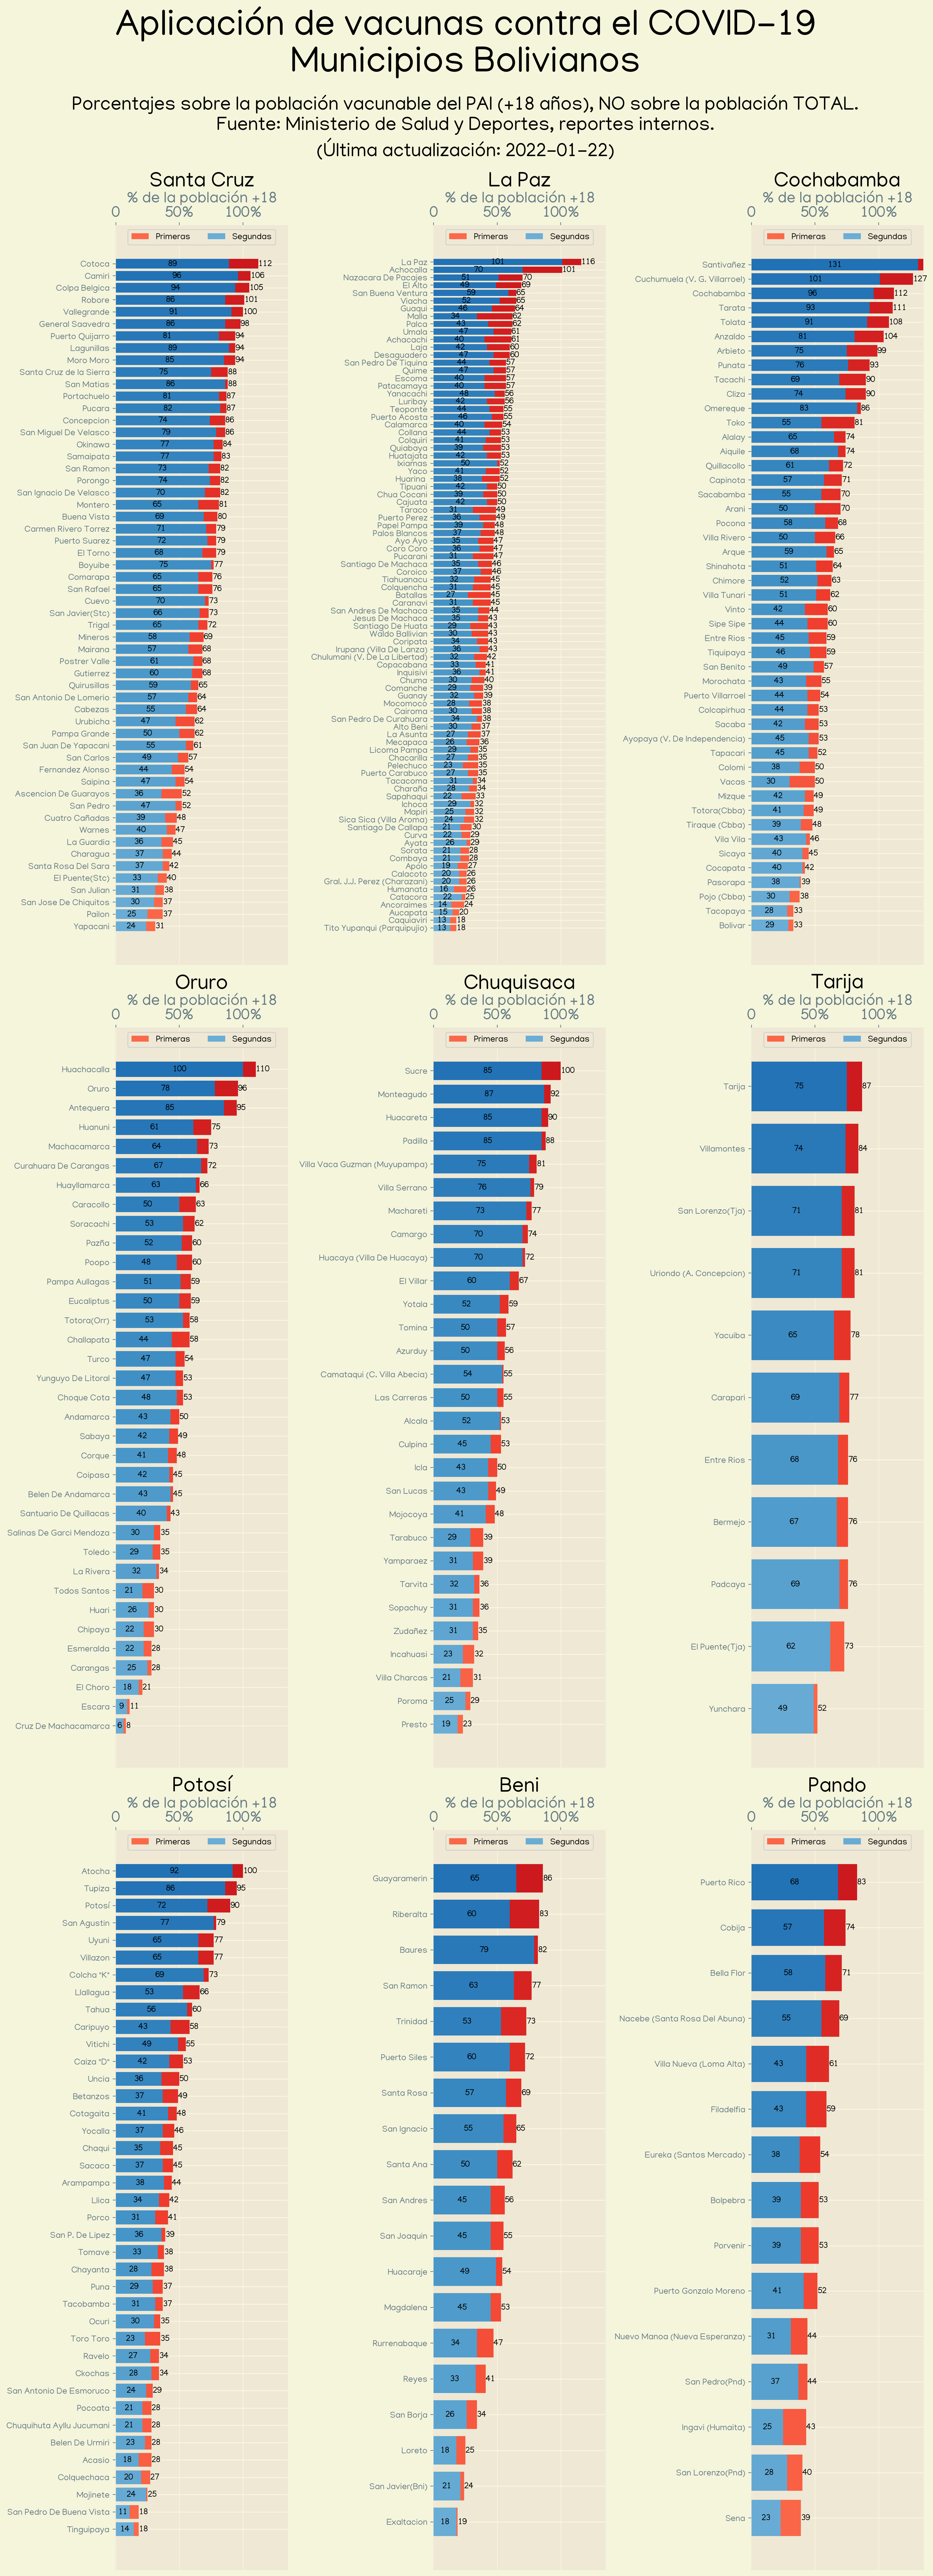

In [19]:
dff = df_wide[df_wide.fecha==str(latest_date)]
dff = dff[dff[1]>0]

### -----------------------

fig, axs = plt.subplots(3,3,figsize = (15,40), dpi=200)
axs = axs.flatten()

fig.suptitle("Aplicación de vacunas contra el COVID-19\nMunicipios Bolivianos", fontsize=42, y=1.03)
fig.text(.5,.97,s="Porcentajes sobre la población vacunable del PAI (+18 años), NO sobre la población TOTAL.\nFuente: Ministerio de Salud y Deportes, reportes internos.\n(Última actualización: {})".format(str(latest_date)), ha="center", fontsize=22)
fig.set_facecolor("beige")

for i in range(9): #POR DEPARTAMENTO
    dfx = dff[dff.departamento==list_dptm[i]]
    dfx = dfx.set_index("municipio").sort_values(1, ascending=True)
    
    axs[i].set_title(list_dptm[i], fontsize=24,pad=3)
    
    primerasbar = axs[i].barh(dfx.index, dfx[1], zorder=3,
                              label="Primeras",
                              color= plt.get_cmap("Reds",  len(dfx)*4) (range(len(dfx)*2, len(dfx)*4) )) 
    segundasbar = axs[i].barh(dfx.index, dfx[2], zorder=3,
                              label="Segundas", 
                              color= plt.get_cmap("Blues", len(dfx)*4) (range(len(dfx)*2, len(dfx)*4) ))
    
    axs[i].bar_label(primerasbar)
    axs[i].bar_label(segundasbar, label_type='center')
    
    axs[i].set_xlabel("% de la población +18", fontsize=18)
    axs[i].xaxis.set_label_position('top') 
    axs[i].xaxis.set_ticks_position('top')      
    axs[i].set_xlim(0,135)
    axs[i].xaxis.set_ticks([0, 50, 100]) 
    axs[i].xaxis.set_ticklabels(["0", "50%", "100%"], fontsize=18) 
    axs[i].grid(alpha=.7, zorder=1, axis="x")
    
    axs[i].legend(loc="upper center",ncol=2,)
    
fig.tight_layout()
fig.savefig("figures/vac_mun_completo.jpg", bbox_inches="tight")

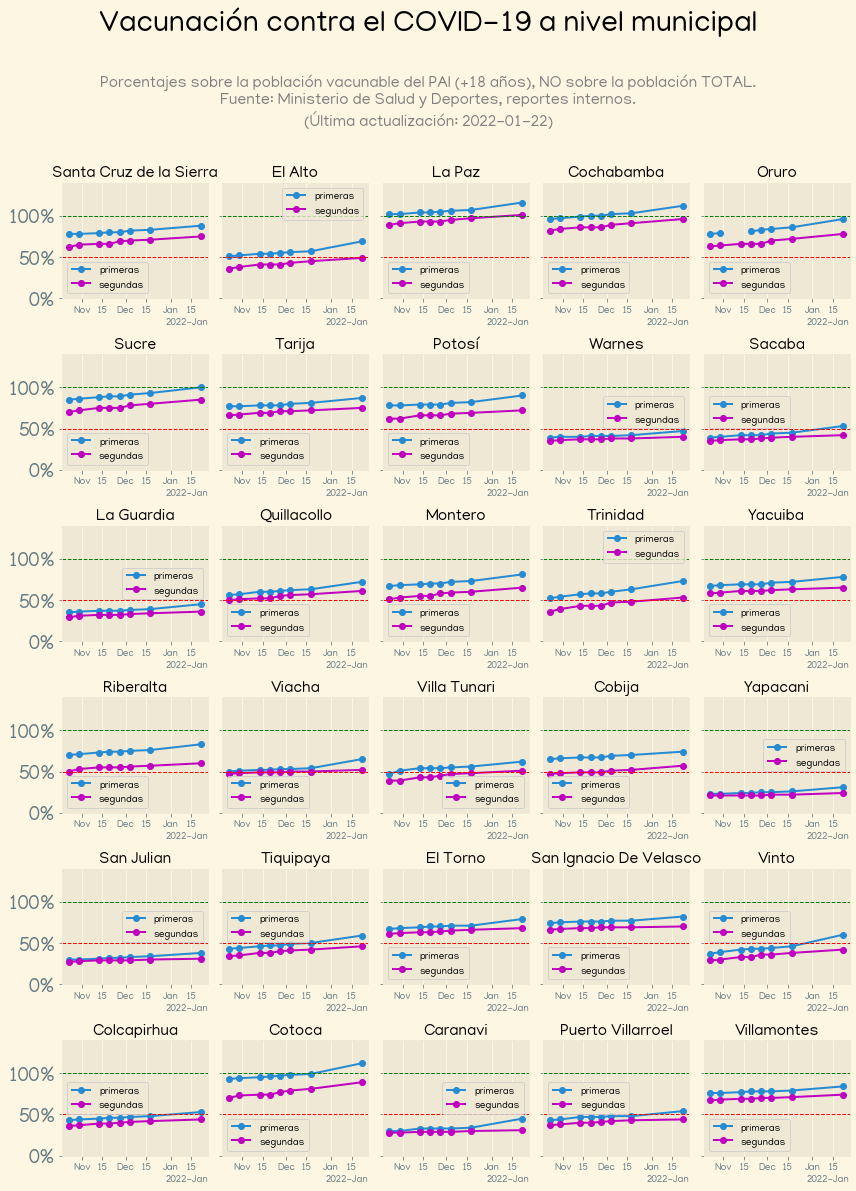

In [20]:
nrows = 6
ncols = 5
ntotal= nrows*ncols

fig, axs = plt.subplots(nrows,ncols, figsize=(12,15), sharey=True)
axs = axs.flatten()
fig.suptitle("Vacunación contra el COVID-19 a nivel municipal", fontsize=30, y=1.1)
fig.text(.5,.99,s="Porcentajes sobre la población vacunable del PAI (+18 años), NO sobre la población TOTAL.\nFuente: Ministerio de Salud y Deportes, reportes internos.\n(Última actualización: {})".format(str(latest_date)), 
         ha="center", fontsize=16, color="gray")
mun = list(mun_dict.keys())[:ntotal]
for i in range(len(mun)):
    df_mun = df_wide[df_wide.cod_ine==mun[i]]
    
    axs[i].set_title(list(mun_dict.values())[i])
    
    axs[i].plot(pd.to_datetime(df_mun.fecha), df_mun[1],#.diff(), 
                label="primeras", marker="o")
    axs[i].plot(pd.to_datetime(df_mun.fecha), df_mun[2],#.diff(), 
                label="segundas", marker="o", color="m")
    
    axs[i].set_ylim(0,140)
    axs[i].set_yticks([0,50,100])
    axs[i].set_yticklabels(["0%", "50%", "100%"], fontsize=20)
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    axs[i].xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs[i].xaxis.get_major_locator()))
    axs[i].axhline(50, color="r", linestyle="--",lw=1)
    axs[i].axhline(100, color="g", linestyle="--",lw=1)

    axs[i].legend()
    
fig.tight_layout()
fig.savefig("figures/vac_mun_grid_timeseries.jpg", bbox_inches="tight")

### topX 

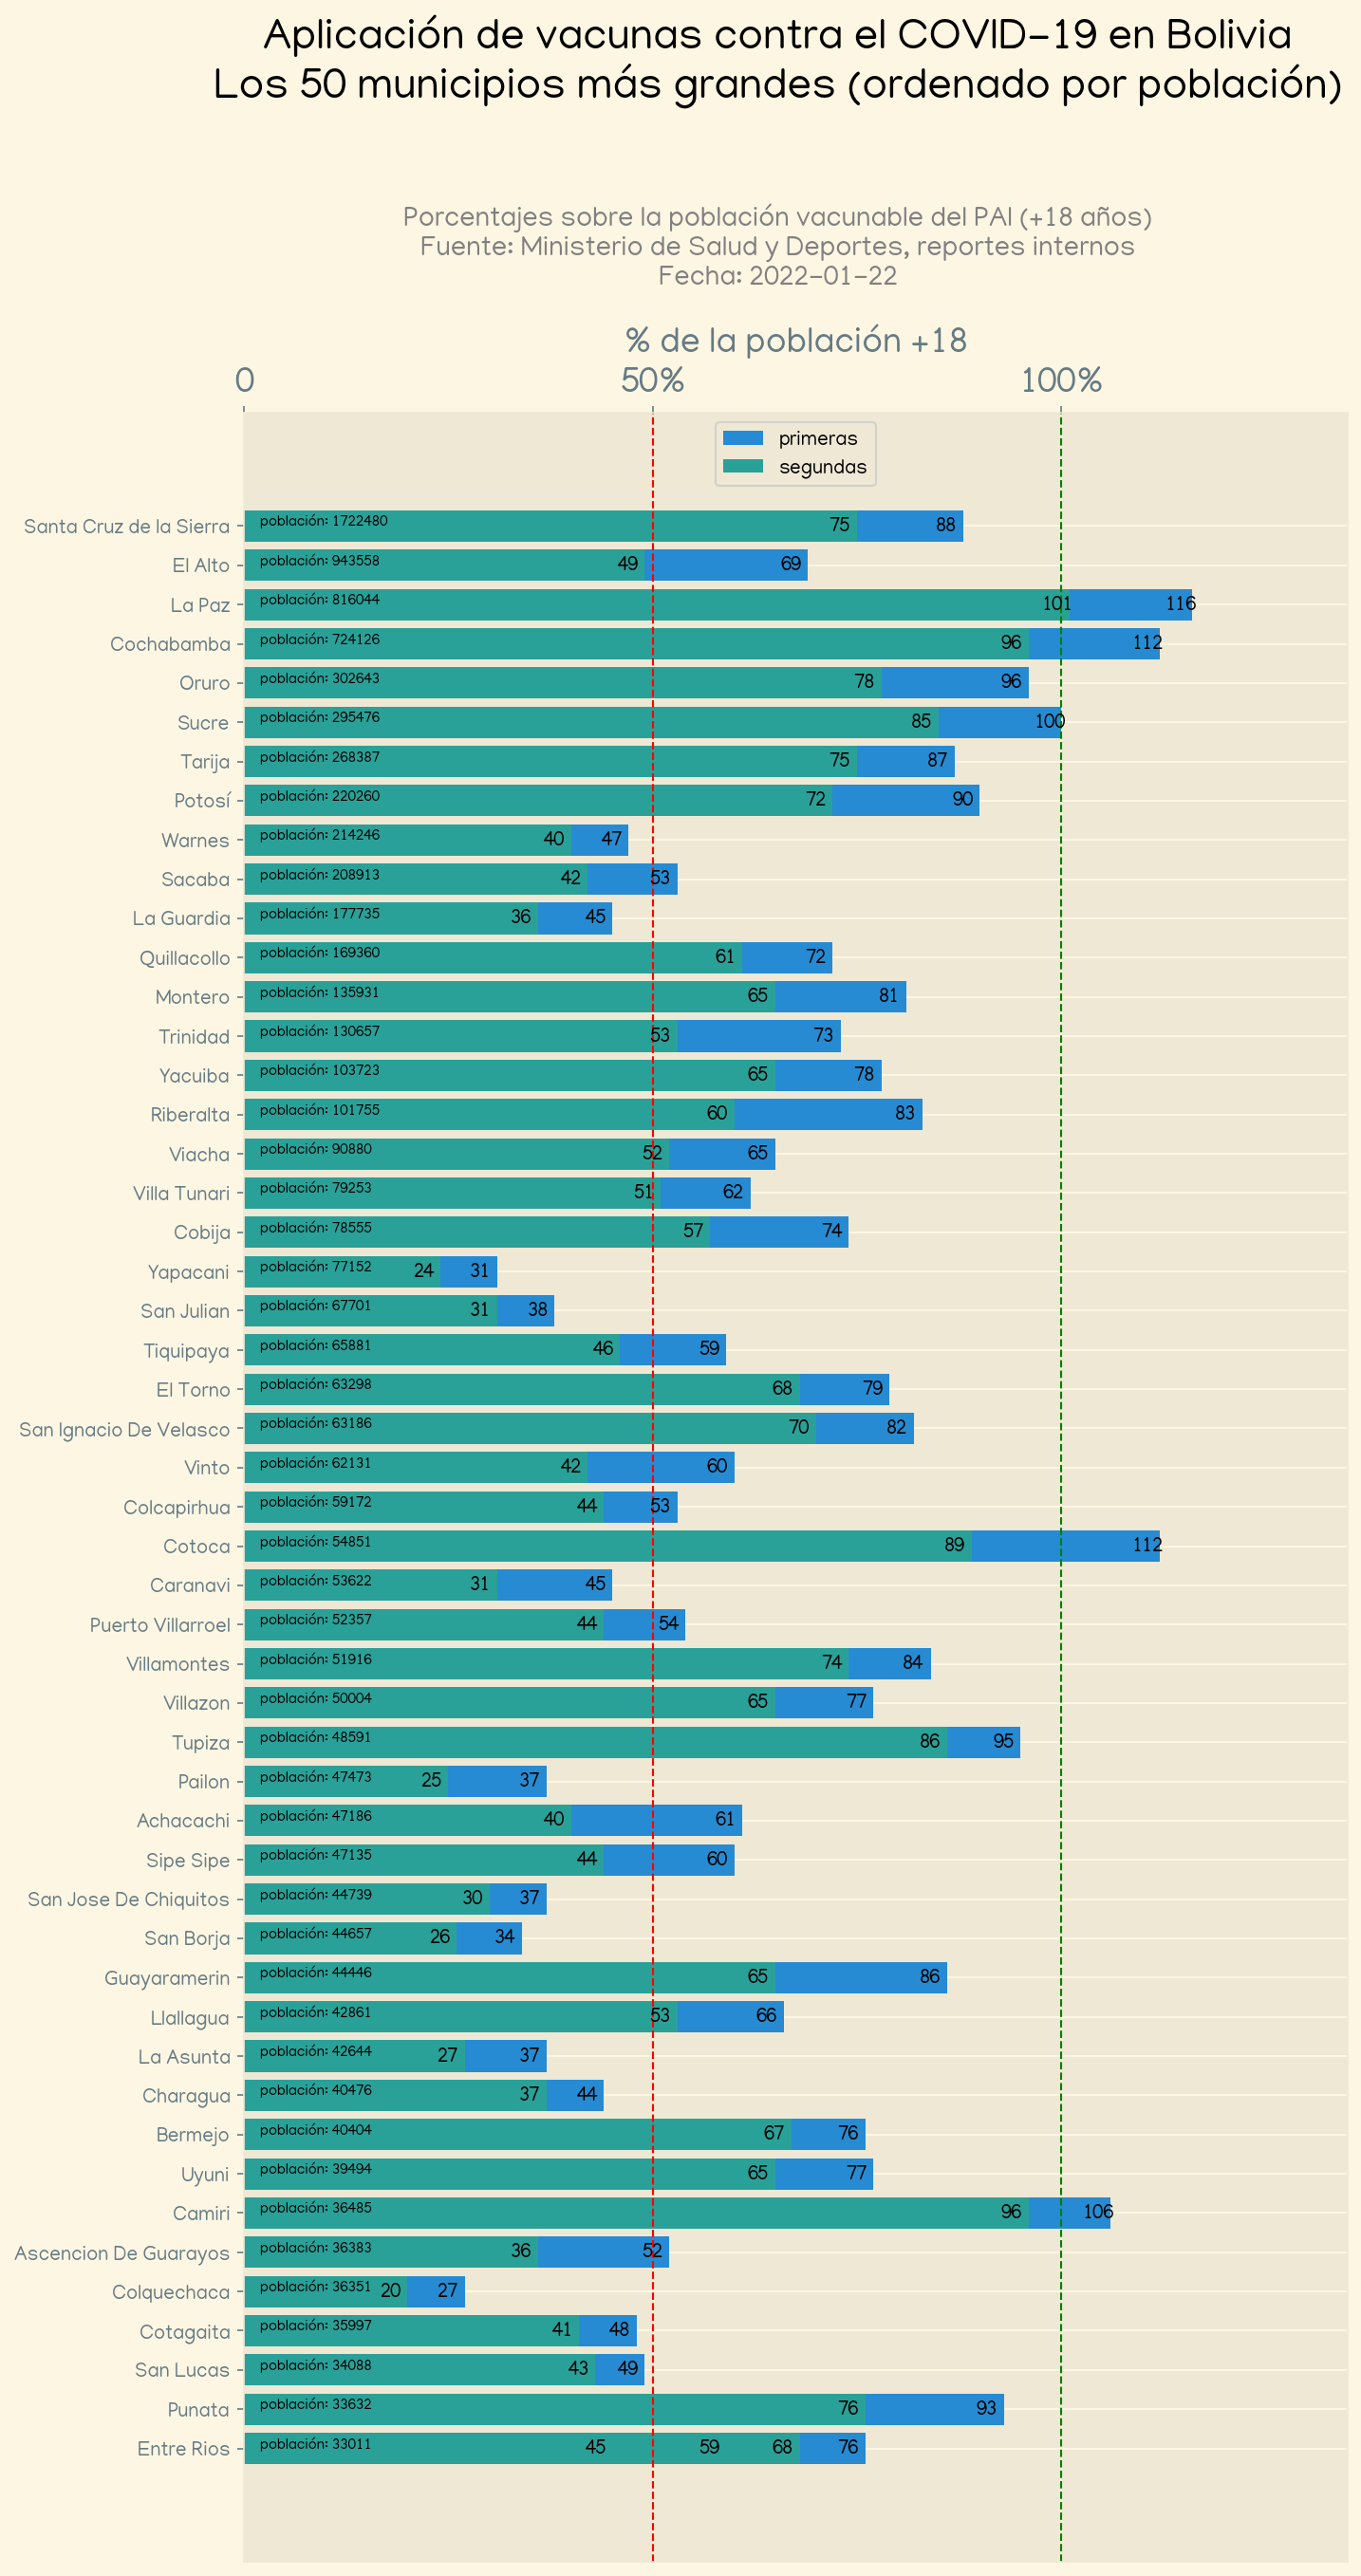

In [23]:
nmun=50

#top municipios, latest date
top = df_wide.sort_values("poblacion2020", ascending=False).municipio.unique()[:nmun]
df_top = df_wide[(df_wide.municipio.isin(top)) & (df_wide.fecha==str(latest_date))].sort_values("poblacion2020")

fig, axs = plt.subplots(1,1,figsize = (10,20), dpi=150)

fig.suptitle("Aplicación de vacunas contra el COVID-19 en Bolivia\nLos {} municipios más grandes (ordenado por población)".format(str(nmun)), 
             fontsize=22, y=1.02)
fig.text(.5,.925,s="Porcentajes sobre la población vacunable del PAI (+18 años)\nFuente: Ministerio de Salud y Deportes, reportes internos\nFecha: {}".format(str(latest_date)), 
         ha="center", fontsize=14, color="gray")

bar1 = axs.barh(df_top.municipio, df_top[1], label="primeras")
bar2 = axs.barh(df_top.municipio, df_top[2], label="segundas")

axs.bar_label(bar1, label_type='edge', padding=-14)
axs.bar_label(bar2, label_type='edge', padding=-14)

for i in range(1,len(df_top)):
    axs.annotate(text="población: "+str(df_top.poblacion2020.iloc[i]), 
                 xy=(2,i-1), fontsize=7.5
                )

axs.set_xlabel("% de la población +18", fontsize=18, labelpad=8)
axs.xaxis.set_label_position('top') 
axs.xaxis.set_ticks_position('top')      
axs.set_xlim(0,135)
axs.xaxis.set_ticks([0, 50, 100]) 
axs.xaxis.set_ticklabels(["0", "50%", "100%"], fontsize=18) 
axs.grid(alpha=.7, zorder=1, axis="x")

axs.axvline(50, color="r", linestyle="--",lw=1)
axs.axvline(100, color="g", linestyle="--",lw=1)
axs.legend(loc="upper center")
fig.savefig("figures/vac_mun_top_poblacion.jpg", bbox_inches="tight")

# MAPAS

In [24]:
df_map_merge = df_map.merge(df_wide, on='cod_ine')
df_map_merge.fecha = df_map_merge.fecha.apply(pd.to_datetime)

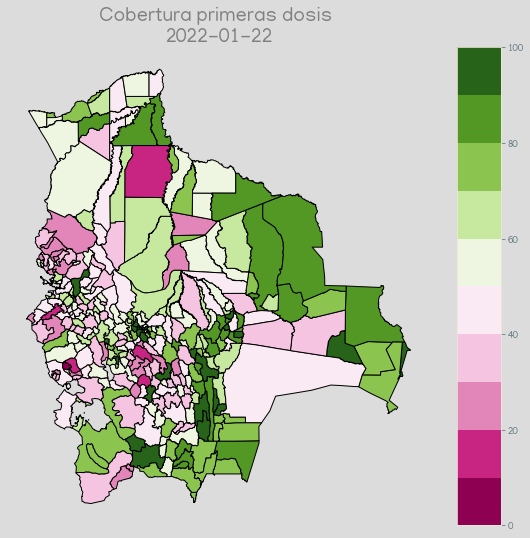

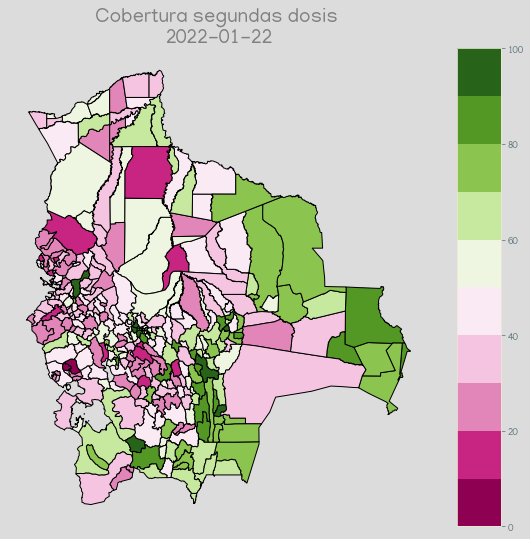

In [25]:
#latest date
def plot_single_map(dosis, subtitle):
    df_frame = df_map_merge.reset_index().groupby("fecha").get_group(str(latest_date))

    cmap = plt.get_cmap("PiYG", 10) #inferno, PiYG, PRGn, PuOr

    fig, axs = plt.subplots(1,1, figsize = (9,9))

    fig.set_facecolor("gainsboro") ##131329
    divider = make_axes_locatable(axs)
    cax = divider.append_axes("right", size="10%", pad=0.25)

    axs.set_title("{} \n{}".format(subtitle, str(latest_date)), fontsize = 20, color="gray")
    axs.axis("off")

    df_frame.plot(column=dosis, # chose dose here
                     ax=axs, 
                     legend=True, 
                     cax=cax, 
                     cmap=cmap,
                     facecolor="black", 
                     edgecolor="black",
                     norm=plt.Normalize(0, 100),
                 )
    # cax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
    # cax.set_xticklabels(["0%", "10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
    fig.savefig("figures/mapa_{}as.jpg".format(str(dosis)), bbox_inches="tight")
# -----------------------------------------------------------    
plot_single_map(dosis=1, subtitle='Cobertura primeras dosis')
plot_single_map(2, "Cobertura segundas dosis")

findfont: Font family ['Impact'] not found. Falling back to DejaVu Sans.


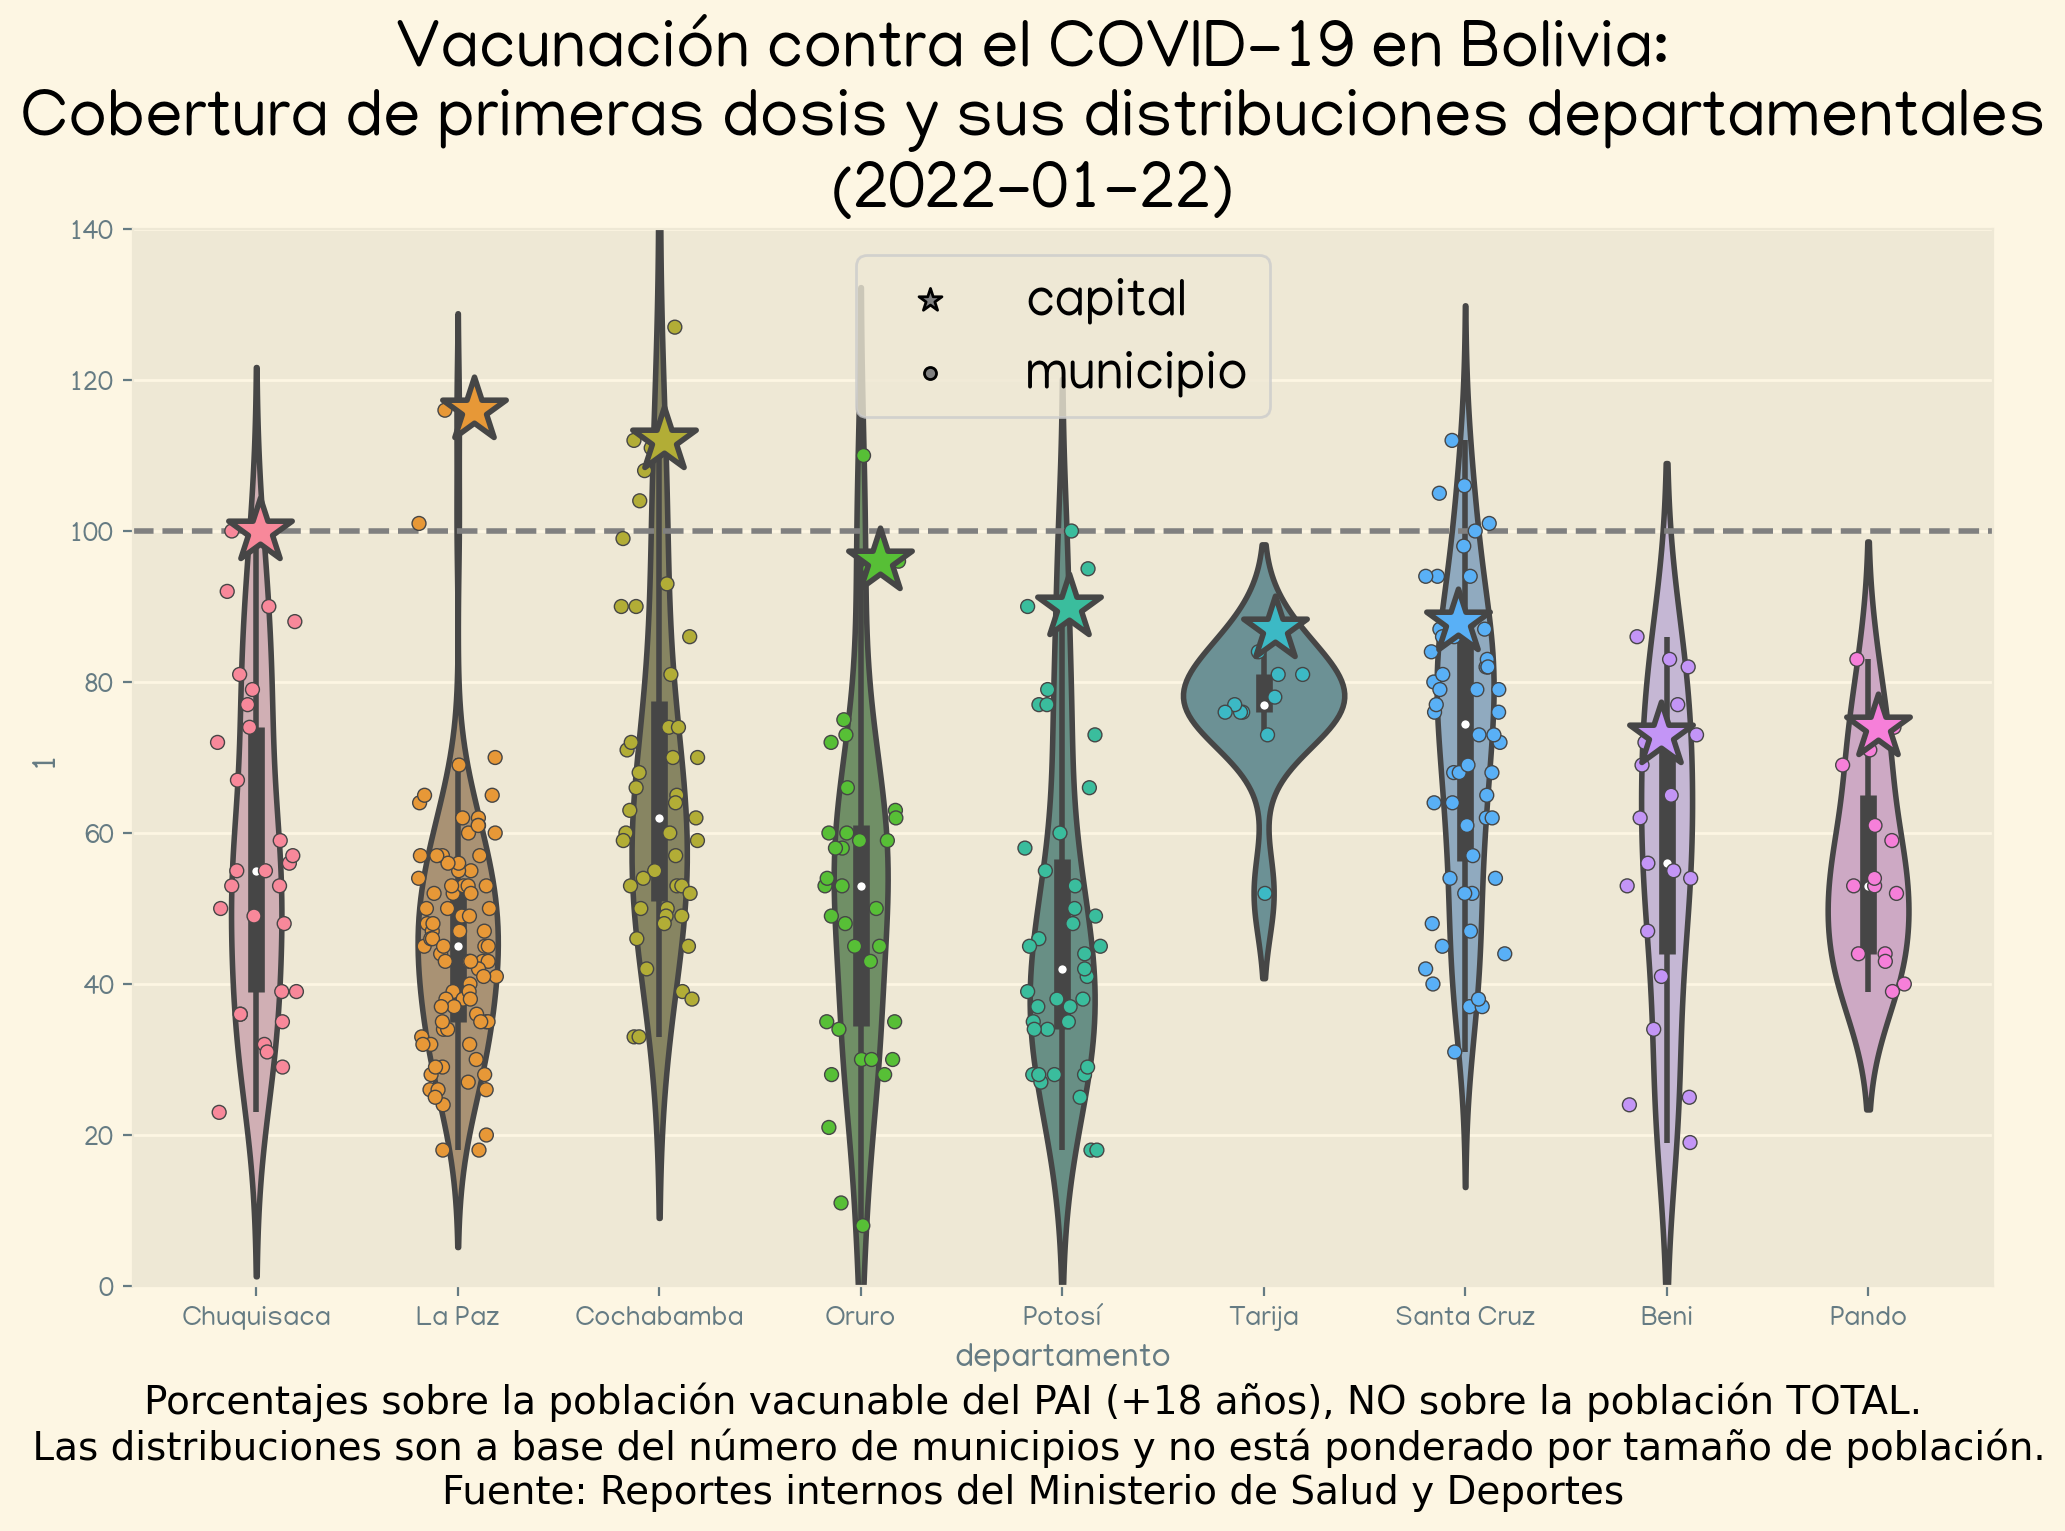

In [26]:
#define dataframe
df_latest = df_wide[df_wide.fecha==str(latest_date)]
dff_cap = df_latest[df_latest.cod_ine.apply(str).str.endswith("0101")]
dff_cap

# --------------

fig, axs = plt.subplots(1,1,figsize=(12,7), dpi=200)
fig.suptitle("Vacunación contra el COVID-19 en Bolivia:\nCobertura de primeras dosis y sus distribuciones departamentales\n({})".format(str(latest_date)), fontsize=24, y=1.03)
fig.text(.5,-.03,s="Porcentajes sobre la población vacunable del PAI (+18 años), NO sobre la población TOTAL.\n Las distribuciones son a base del número de municipios y no está ponderado por tamaño de población.\nFuente: Reportes internos del Ministerio de Salud y Deportes", ha="center", fontsize=14, fontname="Impact")

sns.violinplot(x="departamento", y = 1, data = df_latest, ax=axs, saturation=.3, label="Distribución")
sns.stripplot(x="departamento", y = 1, data = df_latest, ax=axs, jitter=.2, linewidth=.5)
sns.stripplot(x="departamento", y = 1, data = dff_cap, ax=axs, s=24, marker="*", linewidth=2)

axs.axhline(100, linestyle="--", color="grey")
axs.set_ylim(0,140)

#only for legend
marker = plt.scatter([], [], linewidth=1, edgecolor="Black", s=75,
                     c='gray', marker='*', label="capital")
marker = plt.scatter([], [], linewidth=1, edgecolor="Black", s=75,
                     c='gray', marker='.', label="municipio")

axs.legend(fontsize=19, loc="upper center")
fig.savefig("figures/violin_departamentos.jpg")

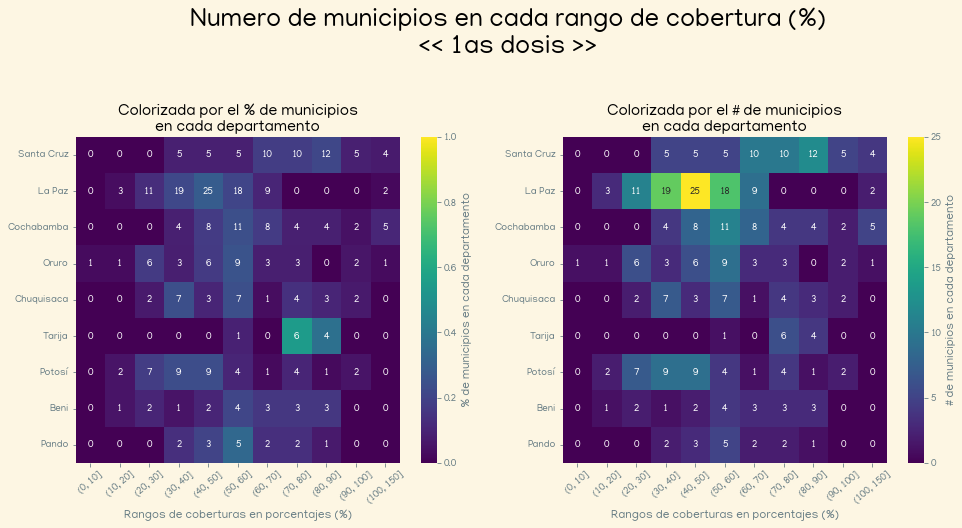

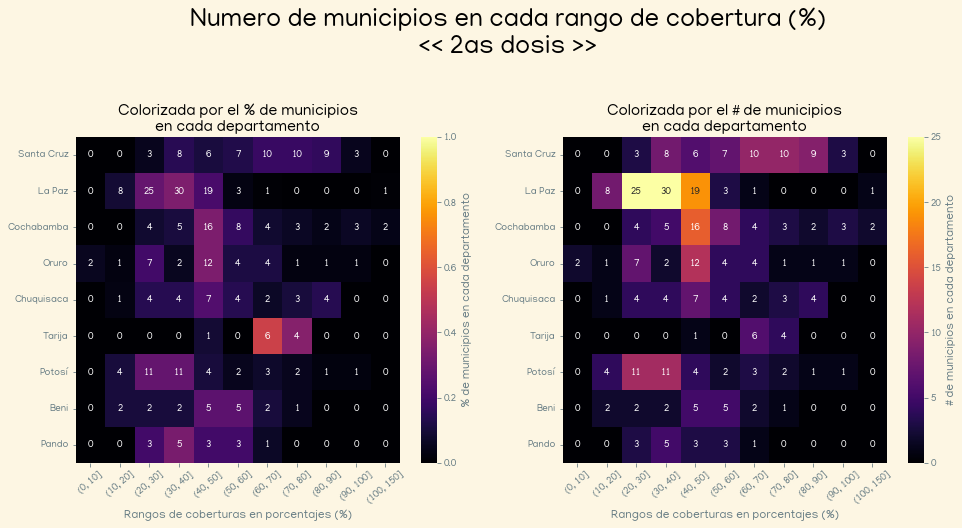

In [27]:
df_latest = dff
df_latest

ranges = [0,10,20,30,40,50,60,70,80,90,100,150]

def range_plotter(dosis, cmap):
    df_rangecount = pd.DataFrame([])
    for i in range(len(list_dptm)):
        dff_dp = dff[dff.departamento==list_dptm[i]]
        counter_df = dff_dp.groupby(pd.cut(dff_dp[dosis], ranges)).count()
        df_rangecount[list_dptm[i]] = counter_df[dosis]
    df_rangecount_norm = df_rangecount.div(df_rangecount.sum(axis=0), axis=1)

    ###### -------------
    fig, axs = plt.subplots(1,2, figsize=(16,6))
    axs = axs.flatten()
    fig.suptitle("Numero de municipios en cada rango de cobertura (%)\n<< {}as dosis >>".format(str(dosis)),
                fontsize=26, y=1.18)
    
    axs[0].set_title("Colorizada por el % de municipios\nen cada departamento")
    sns.heatmap(
               # df_rangecount.T,#.div(df_rangecount.sum(axis=0), axis=1).T,
               df_rangecount_norm.T,
               # annot=True,
               annot=df_rangecount.T,
               cmap=cmap,
               ax=axs[0],
               cbar_kws={"label":"% de municipios en cada departamento"},
               vmin=0,
               vmax=1)
    axs[0].set_xlabel("Rangos de coberturas en porcentajes (%)")
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=40)
    
    axs[1].set_title("Colorizada por el # de municipios\nen cada departamento")
    sns.heatmap(
               df_rangecount.T,#.div(df_rangecount.sum(axis=0), axis=1).T,
               # df_rangecount_norm.T,
               annot=True,
               # annot=df_rangecount.T,
               cmap=cmap,
               ax=axs[1],
               cbar_kws={"label":"# de municipios en cada departamento"},
               vmin=0,
               vmax=25)
    axs[1].set_xlabel("Rangos de coberturas en porcentajes (%)")
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=40)
    fig.savefig("figures/vac_mun_heatmap_{}as.jpg".format(str(dosis)), bbox_inches="tight")

range_plotter(1, "viridis")
range_plotter(2, "inferno")

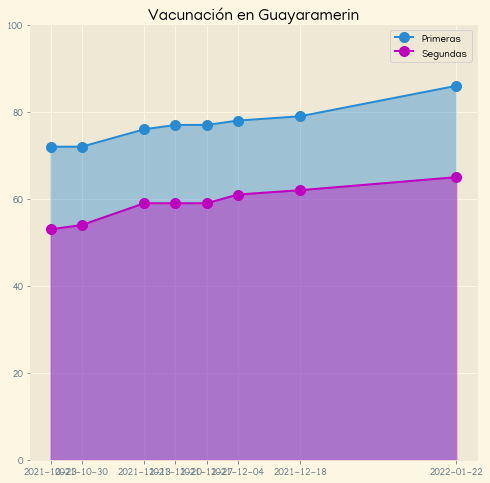

In [29]:
def single_plotter(municipio):
    plt.figure(figsize=(8,8))

    df_mun = df_wide[df_wide.municipio==municipio].set_index("fecha")
    plt.title("Vacunación en {}".format(municipio))
    plt.plot(df_mun[1], label="Primeras", marker=".", markersize=20)
    plt.fill_between(df_mun.index,df_mun[1], alpha=.4)
    plt.plot(df_mun[2], label="Segundas", marker=".", markersize=20, color="m")
    plt.fill_between(df_mun.index,df_mun[2], alpha=.4, color="m")
    plt.xticks(df_mun.index)
    plt.ylim(0,100)
    plt.legend()
    
single_plotter("Guayaramerin")